# Analiza PM2.5 - projekt 3

### Zadanie 1

In [1]:
from get_data import make_pm25_data
from stats import *
from plots import *
import pandas as pd
import importlib

In [2]:
gios_url_ids = {
    2014: "302",
    2015: "236" ,
    2018: "603",
    2019: "322", 
    2021: "486",
    2024: "582", 
    "meta": "622"}

gios_pm25_file = {
    2014: "2014_PM2.5_1g.xlsx",
    2015: "2015_PM25_1g.xlsx",
    2018: "2018_PM25_1g.xlsx",
    2019: "2019_PM25_1g.xlsx",
    2021: "2021_PM25_1g.xlsx",
    2024: "2024_PM25_1g.xlsx",
}

years = [2015, 2018, 2021, 2024]

clean_info = {
    2015: {"header_row":0 , "drop_rows": [0, 1, 2]},
    2018: {"header_row": 1, "drop_rows": [0, 1, 2, 3, 4, 5]},
    2021: {"header_row": 1, "drop_rows": [0, 1, 2, 3, 4,5]},
    2024: {"header_row": 1, "drop_rows": [0, 1, 2, 3, 4, 5]}
}

df_pm25, meta = make_pm25_data(
    years=years,
    gios_url_ids=gios_url_ids,
    gios_pm25_file=gios_pm25_file,
    clean_info=clean_info,
    outfile="PM25.csv"
)

df_pm25.head(10)

Miejscowość                datetime Jelenia Góra      Wrocław               \
Kod stacji                          DsJelGorOgin DsWrocAlWisn DsWrocWybCon   
0           2015-01-01 01:00:00.000      151.112           78           50   
1           2015-01-01 02:00:00.000      262.566           42      33.8244   
2           2015-01-01 03:00:00.005       222.83           27      28.7215   
3           2015-01-01 04:00:00.010      210.767           24      20.6891   
4           2015-01-01 05:00:00.015      191.211           22      22.5335   
5           2015-01-01 06:00:00.020      114.636           19      18.5107   
6           2015-01-01 07:00:00.025      21.4669           23      27.4382   
7           2015-01-01 08:00:00.030      19.7269           32      23.8024   
8           2015-01-01 09:00:00.035      26.6903           38      32.6736   
9           2015-01-01 10:00:00.040      25.9544           38       38.217   

Miejscowość    Bydgoszcz                    Lublin         Łódź       Zgierz  \
Kod stacji  KpBydPlPozna KpBydWarszaw LbLubObywate LdLodzCzerni LdZgieMielcz   
0                   29.2         95.5      71.1012        59.73    58.690689   
1                   27.1         86.1      95.2582       185.92    44.501255   
2                    7.9         23.8      49.5078        54.25    24.163937   
3                    7.1         15.9      60.8468        50.15    19.516039   
4                    9.2           15      49.3106        39.17    16.850332   
5                    7.1         12.7      39.6478        27.67    17.975487   
6                    5.3         11.6      35.6052        19.07    16.226292   
7                    7.6         11.8      37.1828        20.86    17.142969   
8                   10.5         13.5      35.0136        21.02    20.666599   
9                   10.7         17.9      32.0556        19.85    23.429361   

Miejscowość Zielona Góra  ...    Białystok     Przemyśl       Gdańsk  \
Kod stacji  LuZielKrotka  ... PdBialUpalna PkPrzemGrunw PmGdaLeczkow   
0                    NaN  ...           67      18.9027          NaN   
1                51.8628  ...          103      15.9257      75.5278   
2                 15.866  ...           49      16.1709      8.87389   
3                20.1187  ...           37      16.0252      8.83194   
4                27.3413  ...           27      15.5498       6.5675   
5                25.8225  ...           25      15.5701      5.02417   
6                26.4438  ...           18      15.5822      7.98778   
7                30.1887  ...           20      17.0011      6.18639   
8                 33.429  ...           17      17.6716      7.72806   
9                35.8621  ...           18      18.8466        12.02   

Miejscowość  Kościerzyna     Katowice  Złoty Potok      Olsztyn       Kalisz  \
Kod stacji  PmKosTargowa SlKatoKossut SlZlotPotLes WmOlsPuszkin WpKaliSawick   
0                    NaN       51.389      49.9464    44.060833         25.5   
1                    NaN       37.709      45.6291    49.943329         32.5   
2                    NaN       41.984      49.2093    20.688448         24.3   
3                22.7895       45.404       53.316    17.437717         24.4   
4                    NaN       36.854      51.5259    15.532262           25   
5                    NaN       35.999      42.8913    15.167184         21.1   
6                    NaN       35.144      40.8906    12.411852         19.2   
7                     16       36.854      32.7825    12.867249         15.7   
8                     16       38.564       24.885    11.222319         19.2   
9                10.0592       42.839      29.6235     8.655203         24.2   

Miejscowość     Szczecin               
Kod stacji  ZpSzczAndrze ZpSzczPilsud  
0                    NaN          NaN  
1                81.8501      215.379  
2                25.7333      27.7458  
3                 18.624      26.5201  
4                17.6545      31.039

## Sanity checks względem czyszczenia danych

In [3]:
print("Liczba stacji występujących we wszystkich latach: ", len(df_pm25.columns[1:]))
print(
    "Liczba dni w kolejnych latach : ",
    df_pm25["datetime"].dt.date.groupby(df_pm25["datetime"].dt.year).nunique(),
)
print(
    "Przykładowe kody stacji wraz z odpowiadającymi im miejscowościami: ",
    df_pm25.columns[:5],
)

Liczba stacji występujących we wszystkich latach:  30
Liczba dni w kolejnych latach :  datetime
2015    365
2018    365
2021    365
2024    366
Name: datetime, dtype: int64
Przykładowe kody stacji wraz z odpowiadającymi im miejscowościami:  MultiIndex([(    'datetime',             ''),
            ('Jelenia Góra', 'DsJelGorOgin'),
            (     'Wrocław', 'DsWrocAlWisn'),
            (     'Wrocław', 'DsWrocWybCon'),
            (   'Bydgoszcz', 'KpBydPlPozna')],
           names=['Miejscowość', 'Kod stacji'])


Warto zaznaczyć, że 2024 rok był przestępny, więc liczba dni wynosząca 366 nie jest błędem.

/home/olek/Documents/przedmioty/ztp/ztp3_grupa15_fork/stats.py:19: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(["Miejscowość", "Kod stacji"])


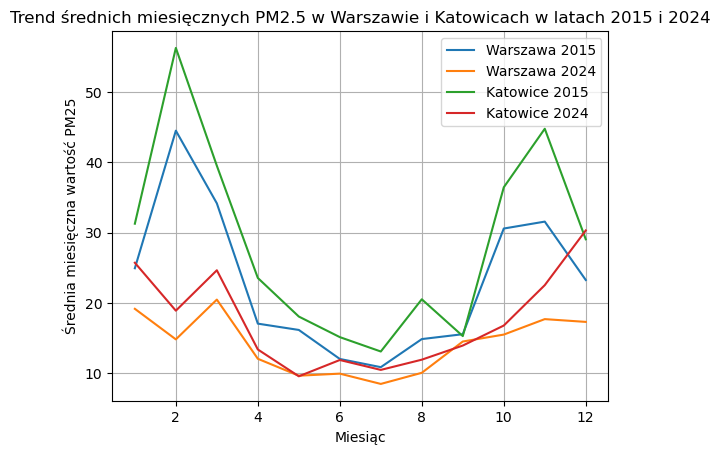

In [4]:
df_pm25_converted = convert_df(df_pm25)
monthly_means = calc_monthly_means(df_pm25_converted)

plot_means(monthly_means, cities=["Warszawa", "Katowice"], years=[2015, 2024])

## Interpretacja wykresu
### 2015
- Na początku roku 2014 średnia wartość PM2.5 osiągała najwyższe wartości w przekroju roku. 
- Najwyższe wartości dla obu miast PM2.5 osiągnęło w lutym, natomiast od marca średnie wartości intensywnie malały. 
- Pomiędzy kwietniem a wrześniem obserwowano najniższe wartości PM2.5 dla obu miast odnotowane w tym roku. 
- W ostatnim kwartale 2015 roku wartości ponownie zaczęły wzrastać w obu miastach - przy czym pod koniec roku średnia wartość PM2.5 zaczęła zauważalnie spadać. 
- Przez cały rok w Katowicach odnotowywano wyższe wartości PM2.5 niż w Warszawie. 

### 2024
- Średnie wartości PM2.5 w tym roku są znacznie niższe w porównaniu z rokiem 2014.
- Podobnie jak w poprzednio analizowanym roku - wartości PM2.5 dla obu miast oscylują w tych samych granicach.
- Najniższe wartości można zauważyć od kwietnia do września tego roku.
- Wraz z początkiem i końcem roku - wartości są wyższe, przy czym od listopada wartości przestają wzrastać w Warszawie, natomiast intensywnie rosną w Katowicach.

/tmp/ipykernel_38074/3352822631.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  heatmaps.show()


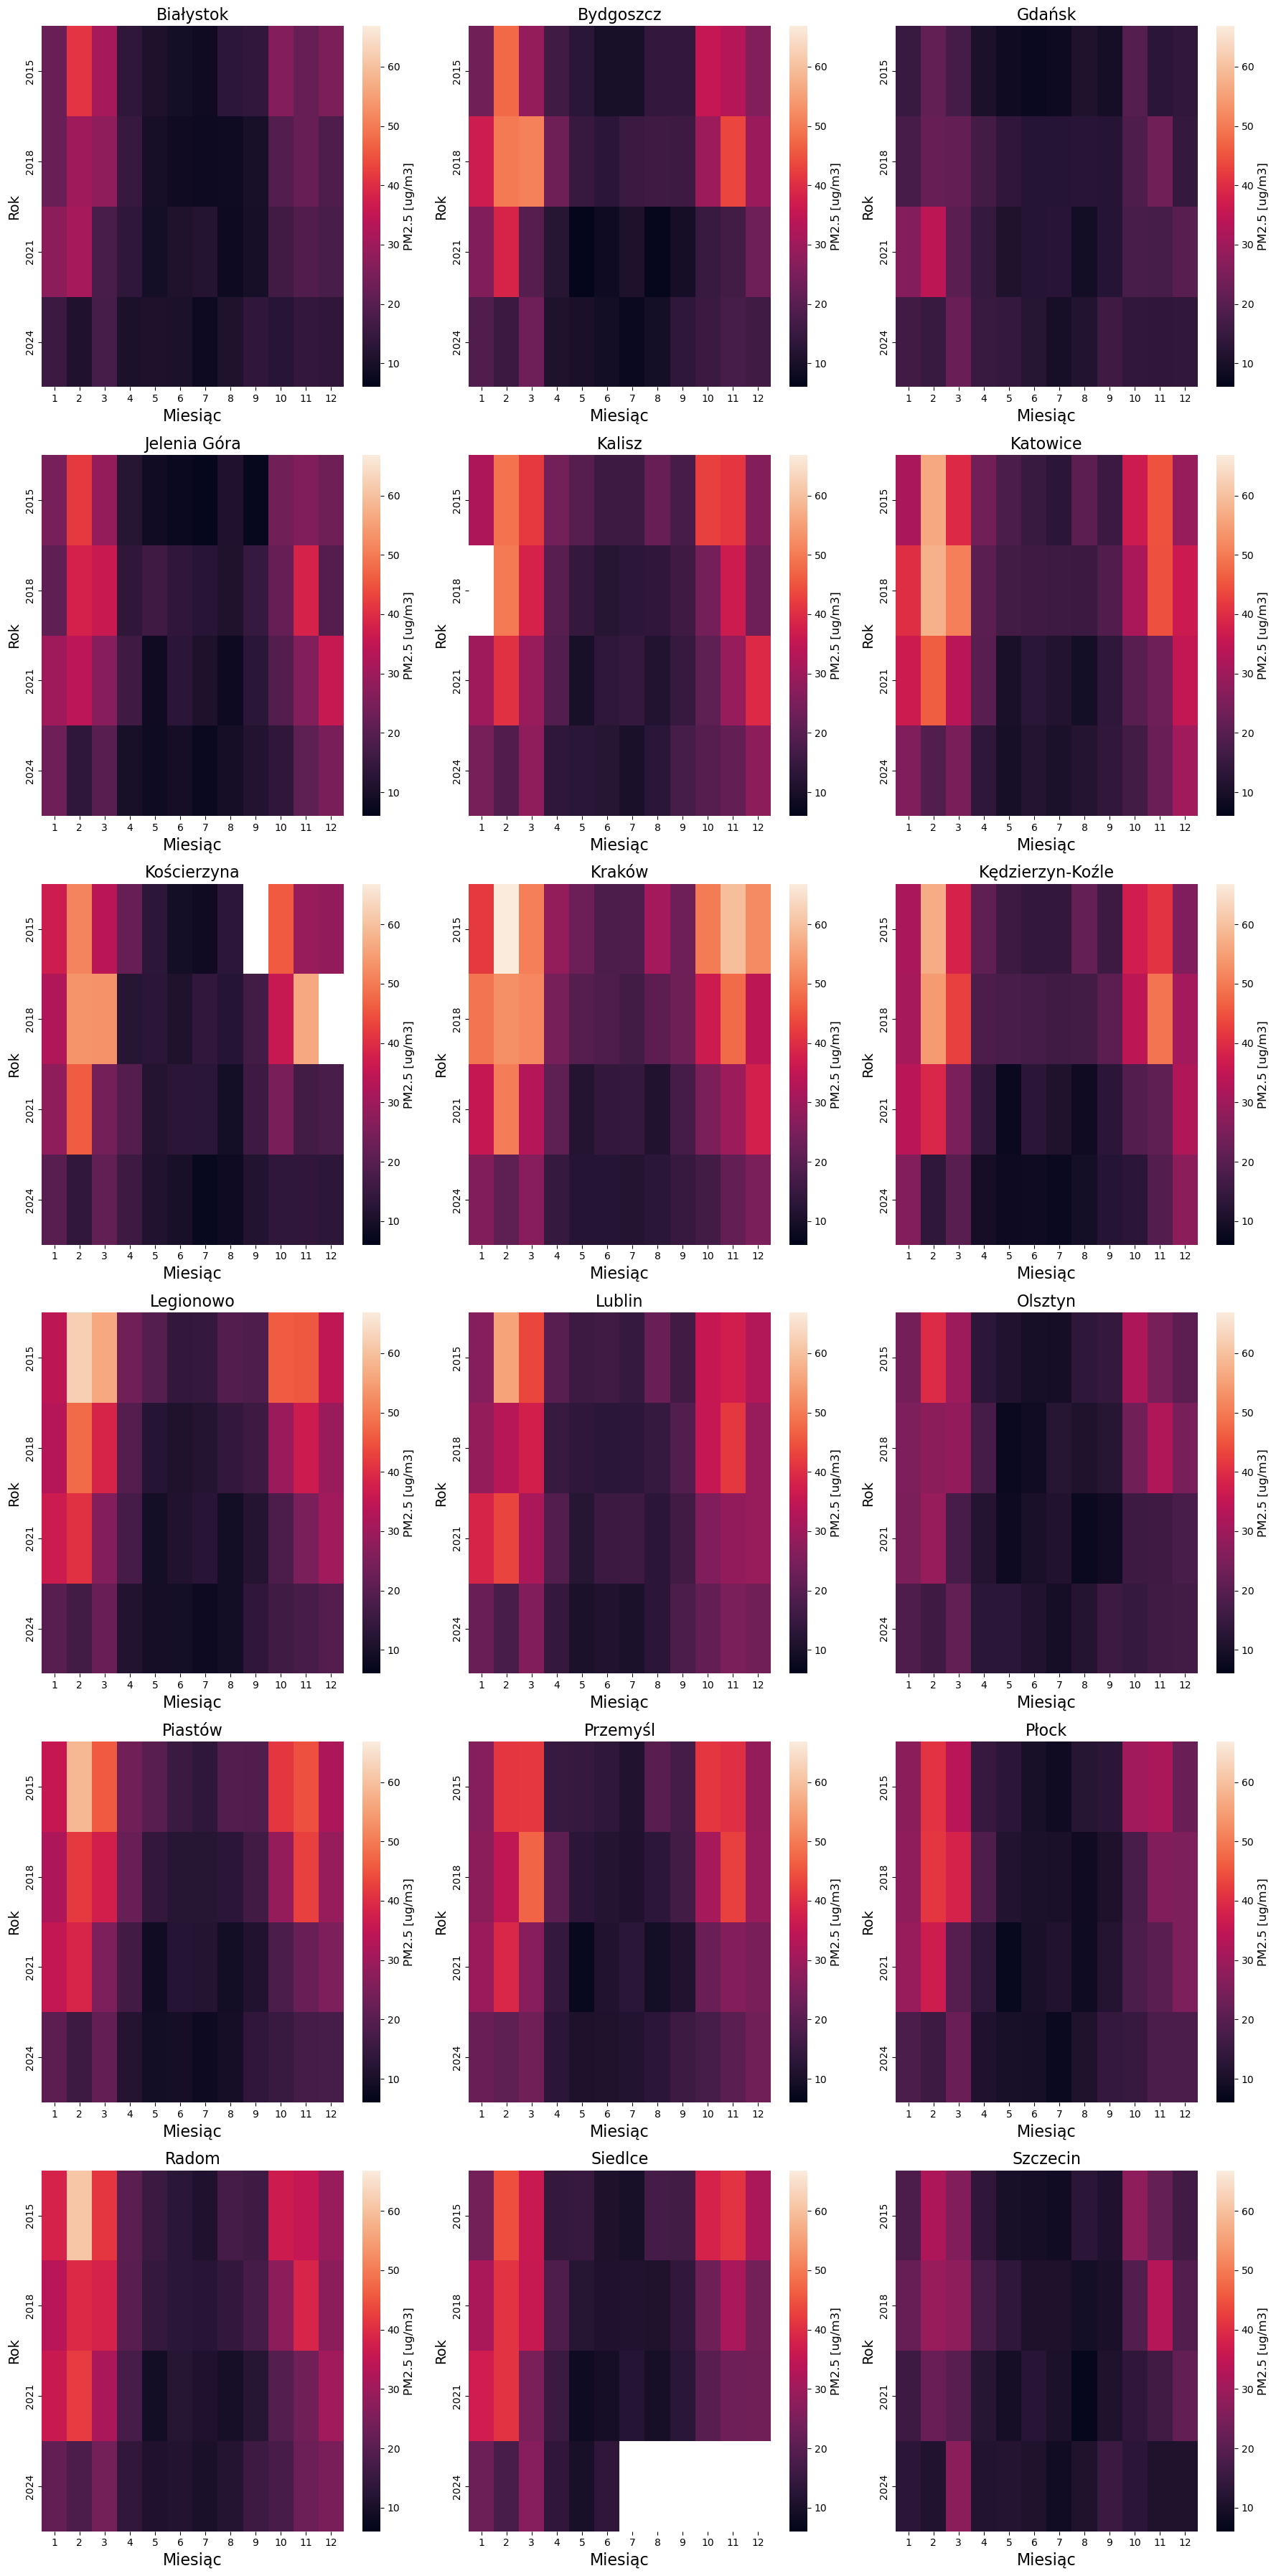

In [7]:
city_monthly = calc_monthly_city_means(monthly_means)
heatmaps = heatmaps_means(city_monthly, years=[2015, 2018, 2021, 2024])
heatmaps.show()

## Analiza i interpretacja danych
- Niezależnie od analizowanej miejscowości najwyższe stężenia pyłu PM2.5 występują w miesiącach jesiennych i zimowych (od października do marca), co może być związane z trwającym w tym czasie sezonem grzewczym. Najniższe wartości obserwowane są natomiast w miesiącach wiosennych i letnich. Cykliczność ta pozostaje niezmienna na przestrzeni lat.

- Występują wyraźne różnice w poziomach stężeń pyłu między miejscowościami. Najwyższe wartości odnotowano w Krakowie w lutym 2015 roku. Nieco niższe, ale nadal bardzo wysokie wartości PM2.5 zauważono w Zgierzu (luty 2018) oraz Radomiu, Piastowie czy Legionowie (również luty - rok 2015)

- W analizowanych latach jakość powietrza uległa wyraźnej poprawie. Powietrze w 2014 roku było znacznie bardziej zanieczyszczone niż powietrze w 2024. Choć spadki jakości powietrza nadal pojawiają się w miesiącach zimowych, są one znacznie mniejsze niż wcześniej. Może to wynikać zarówno z rosnącej świadomości społecznej dotyczącej znaczenia czystego powietrza, jak i z realizacji programów wymiany pieców.


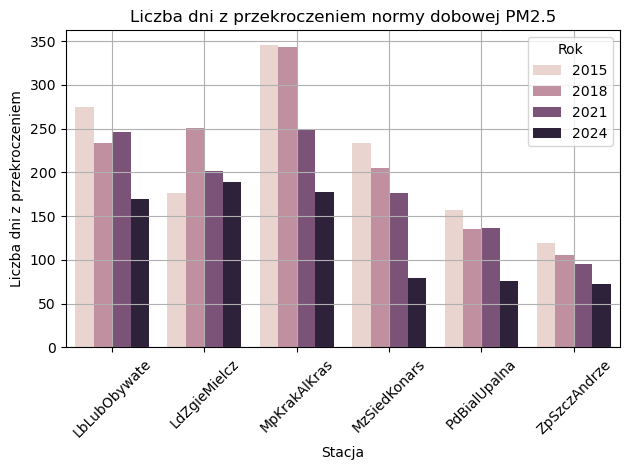

In [8]:
daily = calc_daily_means(df_pm25_converted)
over_counts = count_overnorm_days(daily, threshold=15.0)
selected = top_bottom_stations(over_counts, year=2024, n=3)
plot_overnorm(over_counts, selected, years=[2015, 2018, 2021, 2024])

## Interpretacja wykresu
- na wszystkich 6 stacjach widoczny jest ogólny spadek liczby dni z przekroczeniem normy dobowej PM2.5 w roku 2024 w porównaniu do wcześniejszych lat. Można więc wnioskować o poprawie jakości powietrza.
- Najwyższe wartości liczby dni z przekroczeniem normy odnotowano na stacji MpKrakAlKras w latach 2015 i 2018, gdzie ich liczba przekraczała 300.
- Na stacjach MzSiedKonars oraz MzWarWokalna obserwowano największą poprawę jakości. W 2024 roku liczba dni z przekroczeniem jest tam ponad dwukrotnie mniejsza w poróananiu z najwcześniejszym rokiem.
- Stacja PdBialUpalna charakteryzuje się najmniejszą liczbą dni z przekroczeniami w każdym z analizowanych lat.

## Zadanie 5
Poniższa część notebooka zawiera kod, generujący bar plot pokazujący liczbę dni z przekroczeniem normy stężenia PM2.5 (średnie dzienne stężenie) grupując dane po województwach. Analiza bierze pod uwagę tylko dane z roku zadanego przez parametr `year` - nie było tego w poleceniu, ale uśrednianie wszystkich isntiejących pomiarów wydało mi się dziwne...

Aleksander Janowiak 16.01.2026

In [4]:
# parametry
wojew_dict = {
    'Ds' : 'dolnośląskie',
    'Kp' : 'kujawsko-pomorskie',
    'Lb' : 'lubelskie',
    'Ld' : 'łódzkie',
    'Lu' : 'lubuskie',
    'Mp' : 'małopolskie',
    'Mz' : 'mazowieckie',
    'Op' : 'opolskie',
    'Pd' : 'podlaskie',
    'Pk' : 'podkarpackie',
    'Pm' : 'pomorskie',
    'Sl' : 'śląskie',
    'Wm' : 'warmińsko-mazurskie',
    'Wp' : 'wielkopolskie',
    'Zp' : 'zachodniopomorskie',
    'Sk' : 'świętokrzyskie'
}

year = 2024

treshold = 15

/tmp/ipykernel_27721/3780378261.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data.drop('year', axis=1, inplace=True)
/home/olek/Documents/przedmioty/ztp/ztp3_grupa15_fork/stats.py:19: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(["Miejscowość", "Kod stacji"])
/home/olek/Documents/przedmioty/ztp/ztp3_grupa15_fork/plots.py:158: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")


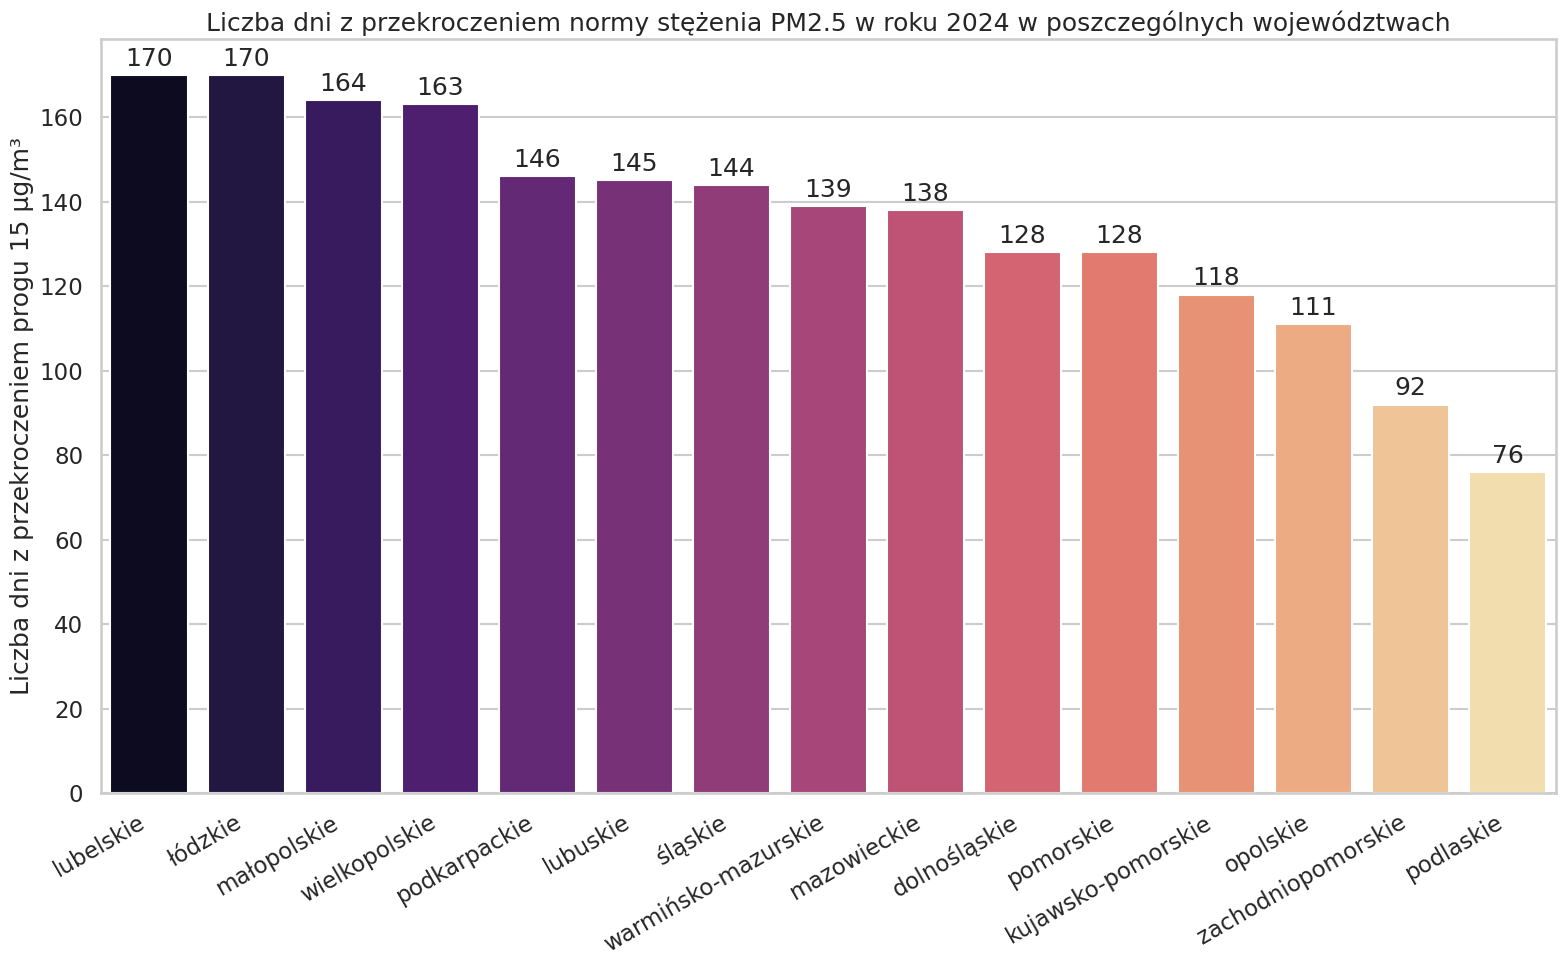

In [ ]:
# ROZWIĄZANIE

data = df_pm25.copy()

# zapowiedziane filtrowanie ze względu na rok
data['year'] = data["datetime"].dt.year
data = data[data['year']==year]
data.drop('year', axis=1, inplace=True)

long = convert_df(data)
counts = wojew_over_treshold(long, wojew_dict=wojew_dict, treshold=treshold)
plot_wojewodztwa(counts, year=year, treshold=treshold)